In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
startingHeight = 100
timeStep = 0.02
gravity = -9.8

time_arr = [0]
v_arr = [0]
num_arr = [startingHeight]
ana_arr = [startingHeight]

In [3]:
def calcNumerik():
    while num_arr[-1] >= 0 :
        time_arr.append(time_arr[-1]+timeStep)
        v_arr.append(gravity*timeStep + v_arr[-1])
        num_arr.append(v_arr[-2]*timeStep + num_arr[-1])
  
def calcAnalitik() :
  for time in time_arr[1:] :
    ana_arr.append((0.5 * gravity * (time**2)) + startingHeight)

def calcPos() :
  calcNumerik()
  calcAnalitik()

In [4]:
def drawPlot() :
  plt.plot(time_arr, ana_arr, color="green", label="analitik")
  plt.plot(time_arr, num_arr, color="orange", label="numerik")
  plt.xlim(0,5)
  plt.ylim(0,100)
  plt.legend()
  plt.show()

In [5]:
def animateSim(time_arr, loc_arr, **kwargs) :
    if kwargs != None :
        v_arr = kwargs.get('v_arr')
    if v_arr == None :
        v_arr = [0] * len(time_arr)
    
    fig = plt.figure()
    #plt.ylim(0, 100)
    ax1 = fig.add_subplot(1,1,1)
    #ax1.ylim(0, 100)
    def animate(i):
        xs = [0]*len(time_arr)
        ys = loc_arr
        ax1.clear()
        for i in range(0, len(xs)-1) :
            ax1.clear()
            ax1.scatter(xs[i], ys[i], color='green')
    
    #ani = animation.FuncAnimation(fig, animate, interval=1000)
    # call the animator     
    anim = animation.FuncAnimation(fig, animate, interval=20) 

    # save the animation as mp4 video file 
    #anim.save('animated_coil4.mp4', writer = 'ffmpeg', fps = 30)
    
    plt.show()
    

In [6]:
def accuracyNum() :
  # total time
  analitik_tot = np.sqrt(np.abs(2*startingHeight/gravity))
  numerik_tot = time_arr[-1]

  #
  print("Akurasi analitik vs numerik")
  print(analitik_tot, numerik_tot)

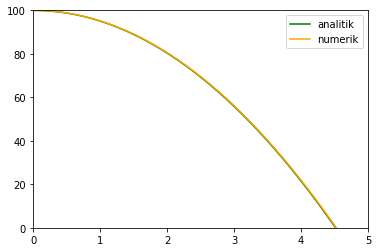

Akurasi analitik vs numerik
4.5175395145262565 4.539999999999991


In [7]:
calcPos()
drawPlot()
accuracyNum()


AttributeError: 'AxesSubplot' object has no attribute 'ylim'

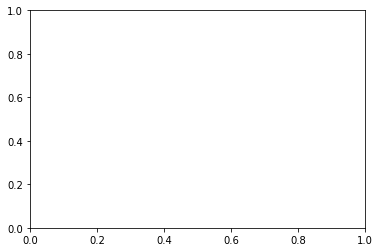

In [8]:
#animateSim(time_arr, num_arr, v_arr=v_arr)
animateSim(time_arr, num_arr)

TypeError: Invalid shape () for image data

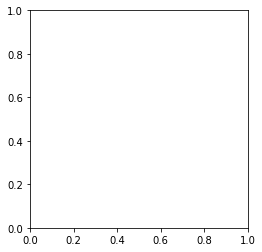

In [11]:
# import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame
ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y), animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                repeat_delay=1000)

# To save the animation, use e.g.
#
ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()